This notebook contains the results for the complete dataset from Austin for the year 2014.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import sys

In [3]:
from common import compute_rmse_fraction

In [4]:
thresholds = {'fridge':10,'hvac':100,'dw':0.5,'mw':0.5,'oven':0.5,'wm':0.5}

In [5]:
from plot_functions import *

In [6]:
import pickle

### Loading all the prediction files

In [7]:
knn_p= pickle.load(open("predictions/knn_all_homes.pkl","r"))
tensor_custom_p = pickle.load(open("predictions/o_tf.pkl",'r'))['tf']
tensor_custom_static_weather_p = pickle.load(open("predictions/o_tf_energy_static.pkl",'r'))['tf_energy_static']
mf_p = pickle.load(open("predictions/o_mf.pkl",'r'))['mf']
tensor_all_p = pickle.load(open("predictions/o_tf_all_appliances.pkl",'r'))['tf_all_appliances']
tensor_all_static_p = pickle.load(open("predictions/o_tf_all_appliances_static_weather.pkl",'r'))['tf_all_appliances_static_weather']
mf_all_p = pickle.load(open("predictions/o_mf_all_appliances.pkl",'r'))['mf_all_appliances']


### KNN prediction and Sensitivity analysis

In [8]:
sanity_num_points = {}

In [9]:
knn= {}
sensitivity_knn={}
sanity_num_points = {}
for appliance in knn_p.keys()[:]:
    print(appliance)
    knn[appliance] = {}
    sensitivity_knn[appliance]={}
    sanity_num_points[appliance]={}
    for feature in ['energy', 'energy_static']:
        sanity_num_points[appliance][feature]={}
        sensitivity_knn[appliance][feature]={}
        best_error = 1e6
        for n in range(1, 10):
            pred = pd.DataFrame(knn_p[appliance][feature][n]).T

            pred_fraction, gt_fraction, error, e = compute_rmse_fraction(appliance,pred)
            assert(len(pred_fraction)==len(gt_fraction))
            sanity_num_points[appliance][feature][n]=len(pred_fraction)
            sensitivity_knn[appliance][feature][n] = error
            if error < best_error:
                best_error = error
                knn[appliance][feature] = best_error

hvac
wm
fridge
mw
oven
dw


In [10]:
pd.DataFrame(knn)

,dw,fridge,hvac,mw,oven,wm
energy,1.892887,4.980033,41.003352,1.975996,2.010145,2.093979
energy_static,1.856814,4.943843,33.872439,1.971375,2.074454,2.068189


In [11]:
pd.Panel(sanity_num_points).mean()

,dw,fridge,hvac,mw,oven,wm
energy,3410.0,3742.0,2354.0,2429.0,1200.0,2451.0
energy_static,3412.0,3744.0,2358.0,2430.0,1200.0,2452.0


In [12]:
pd.DataFrame(knn)

,dw,fridge,hvac,mw,oven,wm
energy,1.892887,4.980033,41.003352,1.975996,2.010145,2.093979
energy_static,1.856814,4.943843,33.872439,1.971375,2.074454,2.068189


In [13]:
pd.Panel(sanity_num_points).mean()

,dw,fridge,hvac,mw,oven,wm
energy,3410.0,3742.0,2354.0,2429.0,1200.0,2451.0
energy_static,3412.0,3744.0,2358.0,2430.0,1200.0,2452.0


In [14]:
%matplotlib inline

In [15]:
sensitivity_all = {}
sanity_all = {}

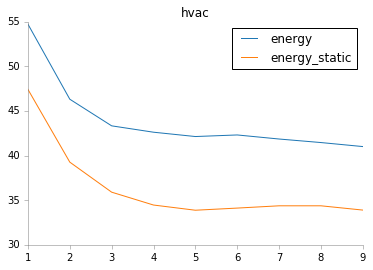

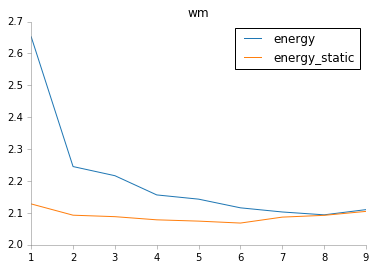

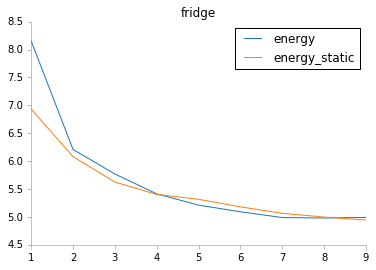

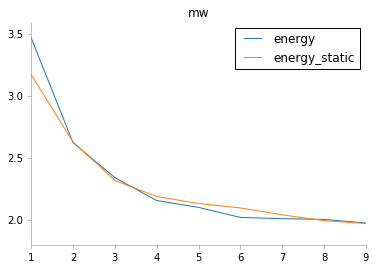

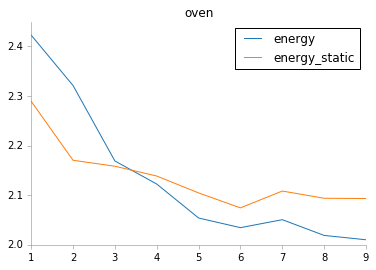

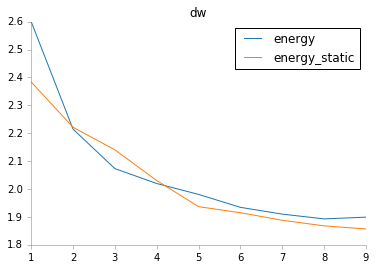

In [16]:
sensitivity = sensitivity_knn
sensitivity_all['KNN'] = sensitivity_knn
sanity_all['KNN'] = pd.Panel(sanity_num_points).mean()

for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity_knn[appliance])
    appliance_df.plot(title=appliance, color = tableau20blind[::2])
    format_axes(plt.gca())

### TF-1-at-a-time

In [17]:
sanity_num_points ={}
dataset = 'False'
cost = 'abs'
tf_custom= {}
sensitivity = {}
for appliance in tensor_custom_p.keys()[:]:
    print(appliance)
    sanity_num_points[appliance] = {}
    sensitivity[appliance] = {}
    tf_custom[appliance]= {}
    for case in [str(x) for x in range(1, 5)]:
        sanity_num_points[appliance][case]={}
        sensitivity[appliance][case] = {}
        best_error = 1e6
        for a in [str(x) for x in range(1, 10)]:
            alpha, beta, error, e = compute_rmse_fraction(appliance,tensor_custom_p[appliance][case][a][cost][dataset])
            assert(len(alpha)==len(beta))
            sanity_num_points[appliance][case][a]=len(alpha)
            sensitivity[appliance][case][a] = error
            if error < best_error:
                best_error = error
                tf_custom[appliance][case] = best_error

hvac
wm
fridge
mw
oven
dw


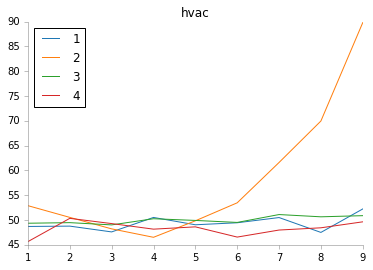

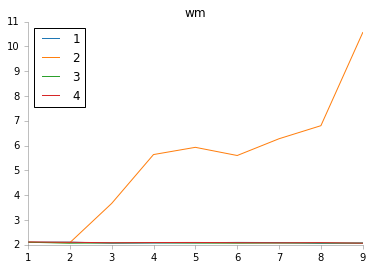

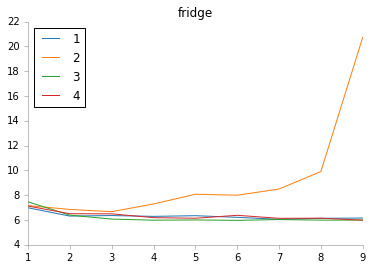

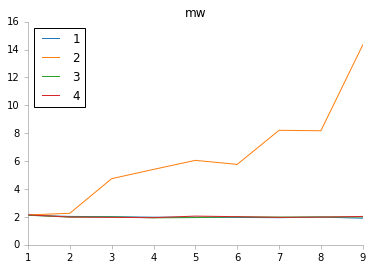

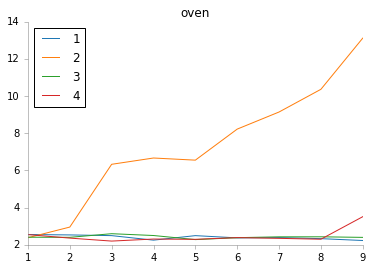

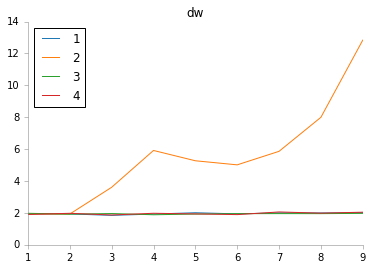

In [18]:
sensitivity_all['TF-1-at-time'] = sensitivity
sanity_all['TF-1-at-time'] = pd.Panel(sanity_num_points).mean()
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity[appliance])
    appliance_df.plot(title=appliance, color=tableau20blind[::2])
    format_axes(plt.gca())

Something seems to be weird with case 2!

In [19]:
pd.Panel(sanity_num_points).mean()

,dw,fridge,hvac,mw,oven,wm
1,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0
2,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0
3,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0
4,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0


### TF-all-appliances

In [20]:
dataset = 'False'
tf_custom_all= {}
cost='abs'
sanity_num_points ={}
sensitivity ={}

for appliance in tensor_custom_p.keys()[:]:
    print(appliance)
    sensitivity[appliance] = {}
    tf_custom_all[appliance]= {}
    sanity_num_points[appliance]={}
    for case in [str(x) for x in range(1, 5)]:
        sensitivity[appliance][case] = {}
        
        sanity_num_points[appliance][case]={}
        best_error = 1e6
        for a in [str(x) for x in range(1, 11)]:
            try:
                pred = tensor_all_p[appliance][case][a][cost]
                
                if len(pred)<500:
                    continue
                if appliance=='hvac':
                    pred = pred[range(4, 10)]
                alpha, beta, error, e = compute_rmse_fraction(appliance,pred)
                assert(len(alpha)==len(beta))
                sanity_num_points[appliance][case][a]=len(alpha)
                sensitivity[appliance][case][a] = error
                if error < best_error:
                    best_error = error
                    tf_custom_all[appliance][case] = best_error
            except Exception, e:
                print(a, appliance, e)

hvac
wm
fridge
mw
oven
dw


In [21]:
pd.DataFrame(tf_custom_all)

,dw,fridge,hvac,mw,oven,wm
1,1.533341,6.949323,21.445088,2.168952,2.077314,2.065229
2,1.544899,6.545914,20.201471,2.145021,2.158957,2.065386
3,1.611922,6.465205,20.850189,2.133791,2.182970,2.077530
4,1.536955,6.035927,19.211247,2.058452,2.112928,2.054236


In [22]:
pd.Panel(sanity_num_points).mean()

,dw,fridge,hvac,mw,oven,wm
1,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0
2,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0
3,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0
4,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0


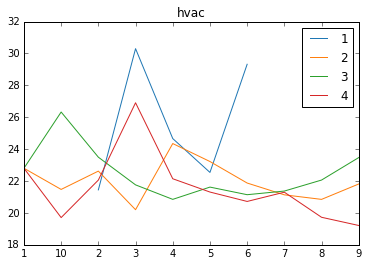

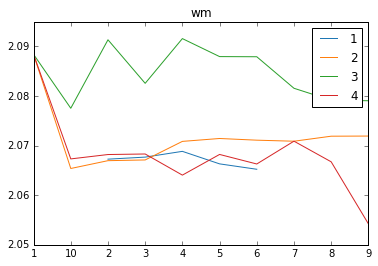

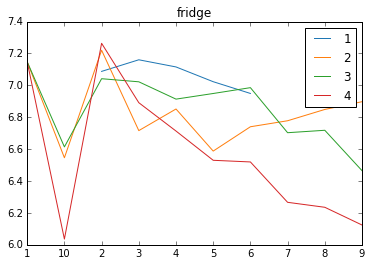

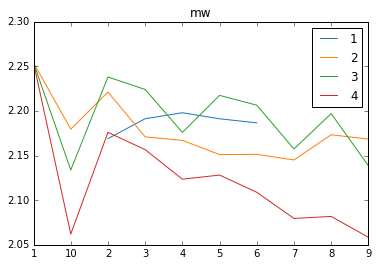

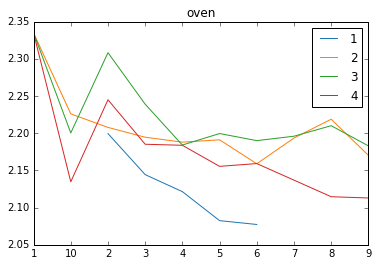

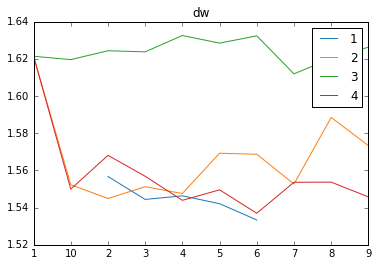

In [23]:
sensitivity_all['TF-all-appliances'] = sensitivity
sanity_all['TF-all-appliances'] = pd.Panel(sanity_num_points).mean()
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity[appliance])
    appliance_df.plot(title=appliance, color=tableau20blind[::2])

### TF-1-at-time with static and weather

In [24]:
dataset = 'False'
tf_custom_static_weather= {}
cost= 'abs'
sanity_num_points = {}
sensitivity = {}
for appliance in tensor_custom_static_weather_p.keys()[:]:
    print(appliance)
    sensitivity[appliance] = {}
    sanity_num_points[appliance] = {}
    tf_custom_static_weather[appliance]= {}
    for static in ['None','static']:
        tf_custom_static_weather[appliance][static] = {}
        for weather in ['None','weather']:
            tf_custom_static_weather[appliance][static][weather] = {}
            sanity_num_points[appliance][(static, weather)] = {}

            best_error = 1e6
            sensitivity[appliance][(static, weather)] = {}
            for a in [str(x) for x in range(1, 10)]:
                alpha, beta, error, e = compute_rmse_fraction(appliance,tensor_custom_static_weather_p[appliance][dataset][a][static][weather][cost])
                assert(len(alpha)==len(beta))
                sanity_num_points[appliance][(static, weather)][a]=len(alpha)
                sensitivity[appliance][(static, weather)][a] = error
                if error < best_error:
                    best_error = error
                    tf_custom_static_weather[appliance][static][weather] = best_error

hvac
wm
fridge
mw
oven
dw


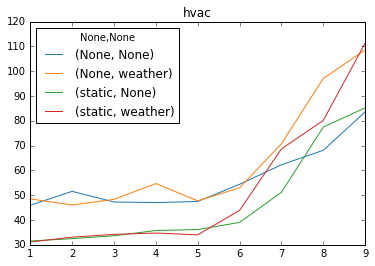

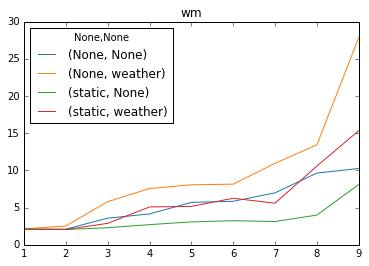

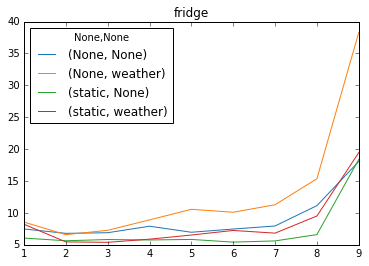

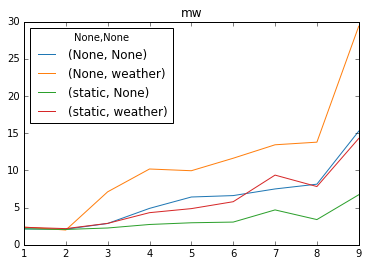

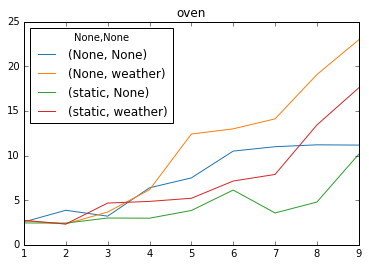

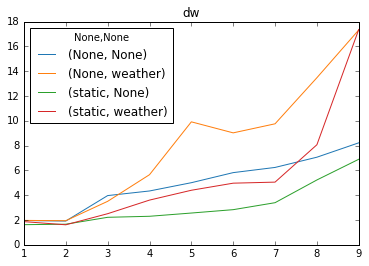

In [25]:
sensitivity_all['TF-1-at-time-static'] = sensitivity
sanity_all['TF-1-at-time-static'] = pd.Panel(sanity_num_points).mean()
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity[appliance])
    appliance_df.plot(title=appliance,  color=tableau20blind[::2])

### TF-all-appliance with static and weather

In [26]:
dataset = 'False'
tf_custom_static_weather_all= {}
cost= 'abs'
sanity_num_points = {}
sensitivity = {}
for appliance in tensor_custom_static_weather_p.keys()[:]:
    print(appliance)
    sensitivity[appliance] = {}
    sanity_num_points[appliance] = {}
    tf_custom_static_weather_all[appliance]= {}
    for static in ['None','static']:
        tf_custom_static_weather_all[appliance][static] = {}
        for weather in ['None','weather']:
            tf_custom_static_weather_all[appliance][static][weather] = {}
            sanity_num_points[appliance][(static, weather)] = {}

            best_error = 1e6
            sensitivity[appliance][(static, weather)] = {}
            for a in [str(x) for x in range(1, 13)]:
                pred = tensor_all_static_p[appliance][static][weather][a]
                
                if len(pred) < 500:
                    continue
                if appliance == 'hvac':
                    pred = pred[range(4, 10)]
                alpha, beta, error, e = compute_rmse_fraction(appliance, pred)
                assert(len(alpha) == len(beta))
                sanity_num_points[appliance][(static, weather)][a] = len(alpha)
                sensitivity[appliance][(static, weather)][a] = error
                if error < best_error:
                    best_error = error
                    tf_custom_static_weather_all[appliance][static][weather] = best_error

hvac
wm
fridge
mw
oven
dw


In [27]:
pd.Panel(sanity_num_points).mean()

dw  fridge    hvac      mw    oven      wm
None   None     3412.0  3744.0  2364.0  2430.0  1200.0  2452.0
       weather  3412.0  3744.0  2364.0  2430.0  1200.0  2452.0
static None     3412.0  3744.0  2364.0  2430.0  1200.0  2452.0
       weather  3412.0  3744.0  2364.0  2430.0  1200.0  2452.0

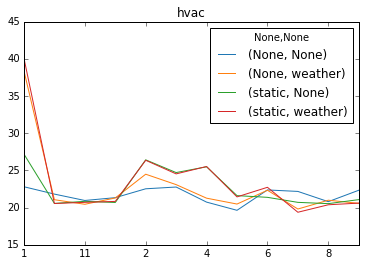

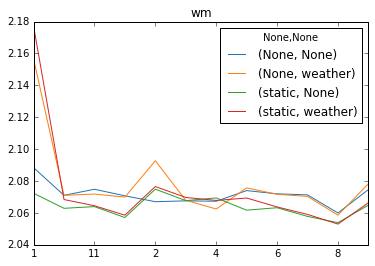

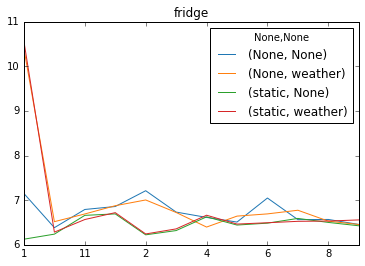

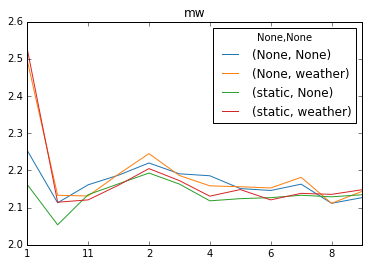

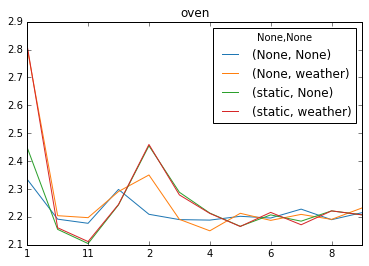

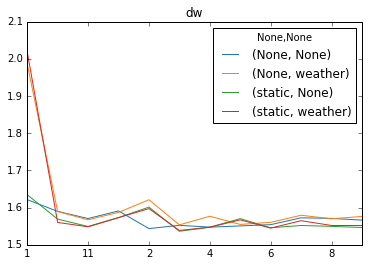

In [28]:
sensitivity_all['TF-all-appliances-static'] = sensitivity
sanity_all['TF-all-appliances-static'] = pd.Panel(sanity_num_points).mean()
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity[appliance])
    appliance_df.plot(title=appliance , color=tableau20blind[::2])

### MF one at a time

In [29]:
mf_results = {}
dataset = 'False'
sanity_num_points = {}
sensitivity = {}
for appliance in mf_p:
    print(appliance)
    mf_results[appliance] = {}
    sanity_num_points[appliance] = {}
    sensitivity[appliance] = {}
    for feature in ['energy_static','energy']:
        mf_results[appliance][feature] = {}
        sensitivity[appliance][feature] = {}
        sanity_num_points[appliance][feature] = {}
        for cost in ['absolute']:
            mf_results[appliance][feature][cost] = {}

            least_error = 1000
            for lat in [str(x) for x in range(1, 10)]:
                try:
                    pred = mf_p[appliance][feature][cost][dataset][lat]
                    if appliance=="hvac":
                        pred = pred[['hvac_%d' %month for month in range(5, 11)]]
                    alpha, beta, error, e  = compute_rmse_fraction(appliance, pred)
                    sensitivity[appliance][feature][lat] = error
                    sanity_num_points[appliance][feature][lat] = len(alpha)
                    if error < least_error:
                        least_error = error
                        best_k = lat
                except Exception, e:
                    pass
            mf_results[appliance][feature][cost] = least_error

hvac
wm
fridge
mw
oven
dw


In [30]:
mf_results

{'dw': {'energy': {'absolute': 1.5273333508519735},
  'energy_static': {'absolute': 1.5281926210671648}},
 'fridge': {'energy': {'absolute': 6.296373261824546},
  'energy_static': {'absolute': 5.5541360041241683}},
 'hvac': {'energy': {'absolute': 14.636647147465634},
  'energy_static': {'absolute': 16.362434649878494}},
 'mw': {'energy': {'absolute': 2.0857295958284148},
  'energy_static': {'absolute': 2.0351074984910009}},
 'oven': {'energy': {'absolute': 2.1044030463371004},
  'energy_static': {'absolute': 2.1064956965465274}},
 'wm': {'energy': {'absolute': 2.0676476218514237},
  'energy_static': {'absolute': 2.0545826969514183}}}

In [31]:
pd.Panel(sanity_num_points).mean()

,dw,fridge,hvac,mw,oven,wm
energy,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0
energy_static,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0


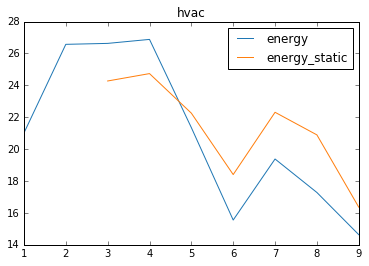

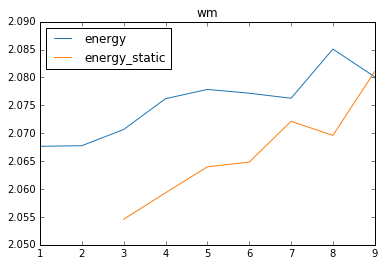

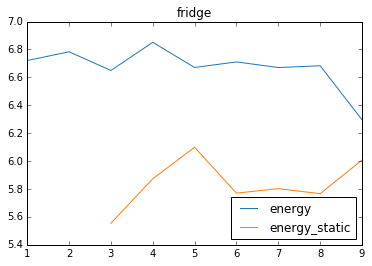

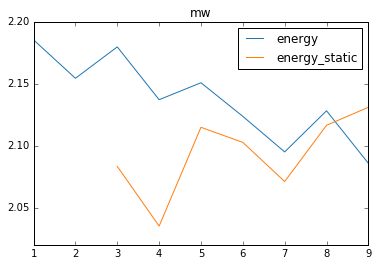

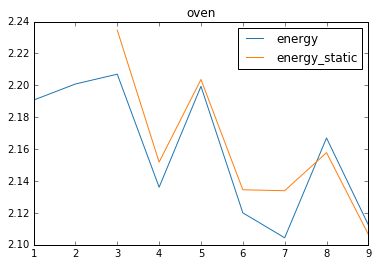

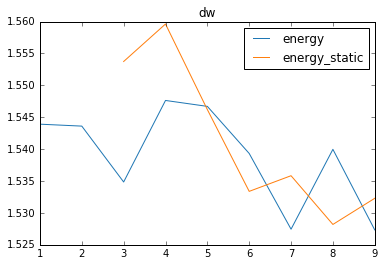

In [32]:
sensitivity_all['MF-1-at-time'] = sensitivity
sanity_all['Mf-1-at-time'] = pd.Panel(sanity_num_points).mean()
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity[appliance])
    appliance_df.plot(title=appliance , color=tableau20blind[::2])

### MF all

In [33]:
mf_all_results = {}
sensitivity = {}
sanity_num_points = {}

dataset = 'False'
cost = 'absolute'
for appliance in mf_p:
    print(appliance)
    mf_all_results[appliance] = {}
    sensitivity[appliance] = {}
    sanity_num_points[appliance] = {}
    
    for feature in ['energy_static','energy']:
        mf_all_results[appliance][feature] = {}
        sensitivity[appliance][feature] = {}
        sanity_num_points[appliance][feature] = {}
        
        
        least_error = 1000
        for lat in [str(x) for x in range(1, 10)]:
            try:
                pred = mf_all_p[appliance][feature][cost][dataset][lat]
                if appliance=="hvac":
                    pred = pred[['hvac_%d' %month for month in range(5, 11)]]
                alpha, beta, error, e  = compute_rmse_fraction(appliance, pred)
                sensitivity[appliance][feature][lat] = error
                sanity_num_points[appliance][feature][lat] = len(alpha)
                
                if error < least_error:
                    least_error = error
                    best_k = lat
            except:
                pass
        mf_all_results[appliance][feature] = least_error

hvac
wm
fridge
mw
oven
dw


In [34]:
pd.DataFrame(mf_all_results)

,dw,fridge,hvac,mw,oven,wm
energy,1.543473,6.583646,22.006545,2.139349,2.165439,10.586593
energy_static,1.527182,5.798812,21.675738,2.087288,2.188188,10.600769


In [35]:
pd.Panel(sanity_num_points).mean()

,dw,fridge,hvac,mw,oven,wm
energy,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0
energy_static,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0


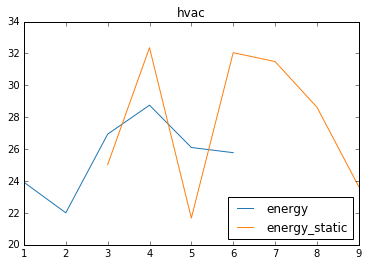

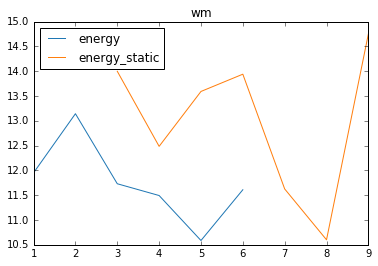

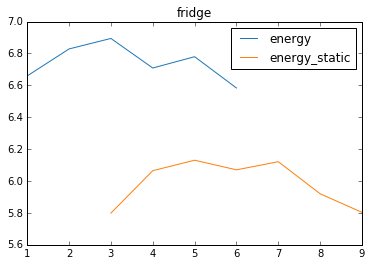

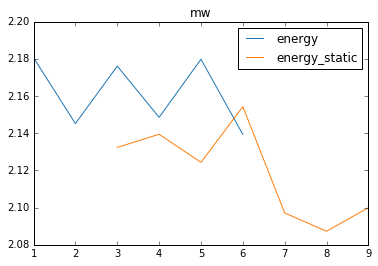

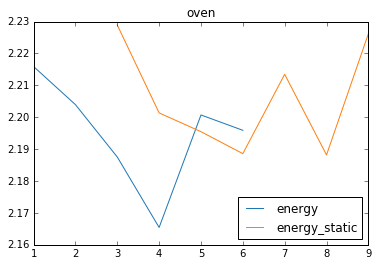

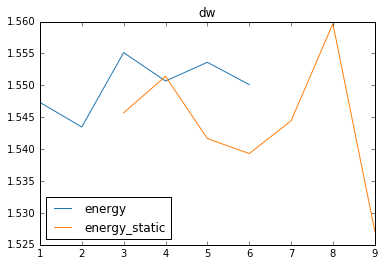

In [36]:
sensitivity_all['MF-all-appliances'] = sensitivity
sanity_all['MF-all-appliances'] = pd.Panel(sanity_num_points).mean()
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity[appliance])
    appliance_df.plot(title=appliance , color=tableau20blind[::2])

In [37]:
out = {}
for static in ['None','static']:
    for weather in ['None','weather']:
        out[(static, weather)] =  {}
        for lat in range(1, 13):
            out[(static, weather)][lat] =  compute_rmse_fraction('hvac',tensor_all_static_p['hvac'][static][weather][str(lat)][range(4, 10)])[2]

In [38]:
pd.DataFrame(out)

None                static           
         None    weather       None    weather
1   22.801893  38.393245  27.189412  40.078872
2   22.528509  24.488210  26.418941  26.361275
3   22.765929  23.087780  24.708426  24.531925
4   20.737126  21.267391  25.485885  25.524858
5   19.636608  20.477520  21.609537  21.439134
6   22.373146  22.331163  21.379563  22.728421
7   22.174592  19.810035  20.704749  19.375324
8   20.797248  20.992323  20.532755  20.381277
9   22.331968  20.574519  21.072033  20.604072
10  21.815156  21.061156  20.559662  20.550647
11  20.957437  20.446916  20.841890  20.706951
12  21.334217  21.293993  20.687999  20.832385

In [39]:
case_2 = {}

for static in ['None','static']:
    for weather in ['None','weather']:
        case_2[(static, weather)] =  {}
        for appliance in mf_p.keys():
            max_error = 1e6
            for lat in range(1, 13):
                if appliance=='hvac':
                    pred = tensor_all_static_p[appliance][static][weather][str(lat)][range(4, 10)]
                else:
                    pred = tensor_all_static_p[appliance][static][weather][str(lat)]
                error = compute_rmse_fraction(appliance,pred)[2]
                if error<max_error:
                    max_error=error
                    case_2[(static, weather)][appliance]=max_error

In [40]:
mf_relative = {}
mf_abs = {}
for appliance in mf_results.keys():
    for cost in ['absolute']:
        if cost=="absolute":
            mf_abs[appliance] =  pd.DataFrame(mf_results[appliance]).ix[cost]
        else:
            mf_relative[appliance] =  pd.DataFrame(mf_results[appliance]).ix[cost]


In [41]:
pd.DataFrame(mf_abs)

,dw,fridge,hvac,mw,oven,wm
energy,1.527333,6.296373,14.636647,2.085730,2.104403,2.067648
energy_static,1.528193,5.554136,16.362435,2.035107,2.106496,2.054583


In [42]:
results_df ={}
results_df[('MF-1-at-a-time','Energy')] = pd.DataFrame(mf_abs).ix['energy']
results_df[('MF-1-at-a-time','Energy+Static')] = pd.DataFrame(mf_abs).ix['energy_static']

results_df[('MF-all-appliances','Energy')] = pd.DataFrame(mf_all_results).ix['energy']
results_df[('MF-all-appliances','Energy+Static')] = pd.DataFrame(mf_all_results).ix['energy_static']

#results_df[('MF (Rel)','Energy')] = pd.DataFrame(mf_relative).ix['energy']
#results_df[('MF (Rel)','Energy+Static')] = pd.DataFrame(mf_relative).ix['energy_static']

#results_df[('Tensor (Parafac)','Energy')] = pd.Series(tensor_parafac_results)


results_df[('KNN','Energy')] = pd.DataFrame(knn).ix['energy']
results_df[('KNN','Energy+Static')] = pd.DataFrame(knn).ix['energy_static']
#results_df[('KNN','Oracle')] = pd.Series(knn_oracle)

#results_df[('KNN (ML)','Energy')] = pd.DataFrame(ml_results).ix['energy']
#results_df[('KNN (ML)','Energy+Static')] = pd.DataFrame(ml_results).ix['energy_static']

for case in [1, 2, 3, 4]:
    results_df[('TF-1-at-a-time-'+str(case),'Energy')] = pd.DataFrame(tf_custom).ix[str(case)]
    results_df[('TF-all-appliances-'+str(case),'Energy')] = pd.DataFrame(tf_custom_all).ix[str(case)]
    
del results_df[('TF-all-appliances-'+str(2),'Energy')]

results_df[('TF-all-appliances-'+str(2),'Energy')] = pd.DataFrame(case_2)[('None','None')]
results_df[('TF-all-appliances-'+str(2),'Energy+Static')] = pd.DataFrame(case_2)[('static','None')]
results_df[('TF-all-appliances-'+str(2),'Energy+Weather')] = pd.DataFrame(case_2)[('None','weather')]
results_df[('TF-all-appliances-'+str(2),'Energy+Static+Weather')] = pd.DataFrame(case_2)[('static','weather')]

In [43]:
pd.DataFrame(results_df)

KNN               MF-1-at-a-time                \
           Energy Energy+Static         Energy Energy+Static   
dw       1.892887      1.856814       1.527333      1.528193   
fridge   4.980033      4.943843       6.296373      5.554136   
hvac    41.003352     33.872439      14.636647     16.362435   
mw       1.975996      1.971375       2.085730      2.035107   
oven     2.010145      2.074454       2.104403      2.106496   
wm       2.093979      2.068189       2.067648      2.054583   

       MF-all-appliances               TF-1-at-a-time-1 TF-1-at-a-time-2  \
                  Energy Energy+Static           Energy           Energy   
dw              1.543473      1.527182         1.846493         1.929475   
fridge          6.583646      5.798812         6.053854         6.671928   
hvac           22.006545     21.675738        47.497272        46.512457   
mw              2.139349      2.087288         1.905822         2.140249   
oven            2.165439      2.188188         2.230833         2.380696   
wm             10.586593     10.600769         2.059581         2.084367   

       TF-1-at-a-time-3 TF-1-at-a-time-4 TF-all-appliances-1  \
                 Energy           Energy              Energy   
dw             1.884415         1.870711            1.533341   
fridge         5.971953         5.986865            6.949323   
hvac          49.013066        45.646503           21.445088   
mw             1.933182         1.945291            2.168952   
oven           2.279464         2.200116            2.077314   
wm             2.063697         2.065101            2.065229   

       TF-all-appliances-2                                                     \
                    Energy Energy+Static Energy+Static+Weather Energy+Weather   
dw                1.543637      1.536400              1.538616       1.553591   
fridge            6.384170      6.125701              6.243000       6.397408   
hvac             19.636608     20.532755             19.375324      19.810035   
mw                2.111590      2.053790              2.114503       2.111534   
oven              2.177075      2.104510              2.111600       2.150156   
wm                2.059971      2.053876              2.052993       2.058596   

       TF-all-appliances-3 TF-all-appliances-4  
                    Energy              Energy  
dw                1.611922            1.536955  
fridge            6.465205            6.035927  
hvac             20.850189           19.211247  
mw                2.133791            2.058452  
oven              2.182970            2.112928  
wm                2.077530            2.054236

In [44]:
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: gray' if v else '' for v in is_min]

In [45]:
pd.set_option('precision', 3)
out = pd.DataFrame(results_df).T
out.columns = [str.capitalize(x) for x in out.columns]
import seaborn as sns

cm = sns.light_palette("orange", as_cmap=True)

s = out.style.background_gradient(cmap=cm)
s
#out.style.apply(highlight_min)
#out.style.set_properties(**{'text-align': 'right'})


In [48]:
3418.0/12

284.8333333333333